In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import graphviz
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("C:/Users/Aston/OneDrive/Desktop/CPE 695/HW 3/Titanic.csv")
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.describe()

,Unnamed: 0,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,655.000000,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,378.020061,0.486055,14.413500,1.041658,0.865560,51.758669,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,328.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,655.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,982.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,1309.000000,1.000000,80.000000,8.000000,9.000000,512.329224,328.000000


In [4]:
df.shape

(1309, 15)

C:\Users\Aston\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

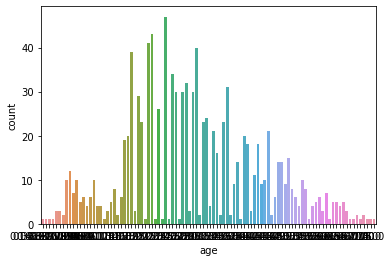

In [5]:
sns.countplot(df['age'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   object 
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1046 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  cabin       295 non-null    object 
 11  embarked    1307 non-null   object 
 12  boat        486 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   745 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


### We can see that the column age has some missing values

In [7]:
df['age'].fillna((df['age'].mean()),inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   object 
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1309 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  cabin       295 non-null    object 
 11  embarked    1307 non-null   object 
 12  boat        486 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   745 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


In [9]:
df.drop(['Unnamed: 0','name','parch','ticket','fare','cabin','embarked','boat','body','home.dest'], axis=1,inplace=True)

In [10]:
df.head()

,pclass,survived,sex,age,sibsp
0,1st,1,female,29.0000,0
1,1st,1,male,0.9167,1
2,1st,0,female,2.0000,1
3,1st,0,male,30.0000,1
4,1st,0,female,25.0000,1


### In the column sex, we encode female and male as 0 and 1 respectively

In [11]:
df['sex'].replace(['male','female'],[0,1],inplace=True)
df['pclass'].replace(['1st','2nd','3rd'],[1,2,3],inplace=True)
df.head()

,pclass,survived,sex,age,sibsp
0,1,1,1,29.0000,0
1,1,1,0,0.9167,1
2,1,0,1,2.0000,1
3,1,0,0,30.0000,1
4,1,0,1,25.0000,1


In [12]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   int64  
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 51.3 KB


In [13]:
y=df.survived
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [14]:
x=df.drop('survived',axis=1)
x.head()

,pclass,sex,age,sibsp
0,1,1,29.0000,0
1,1,0,0.9167,1
2,1,1,2.0000,1
3,1,0,30.0000,1
4,1,1,25.0000,1


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

### Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import tree
dt=DecisionTreeClassifier(criterion='entropy')

In [17]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
#fig=plt.figure(figsize=(300,200))
#tree.plot_tree(dt,feature_names=['pclass','sex','age','sibsp'],class_names=['no','yes'])
#plt.show()

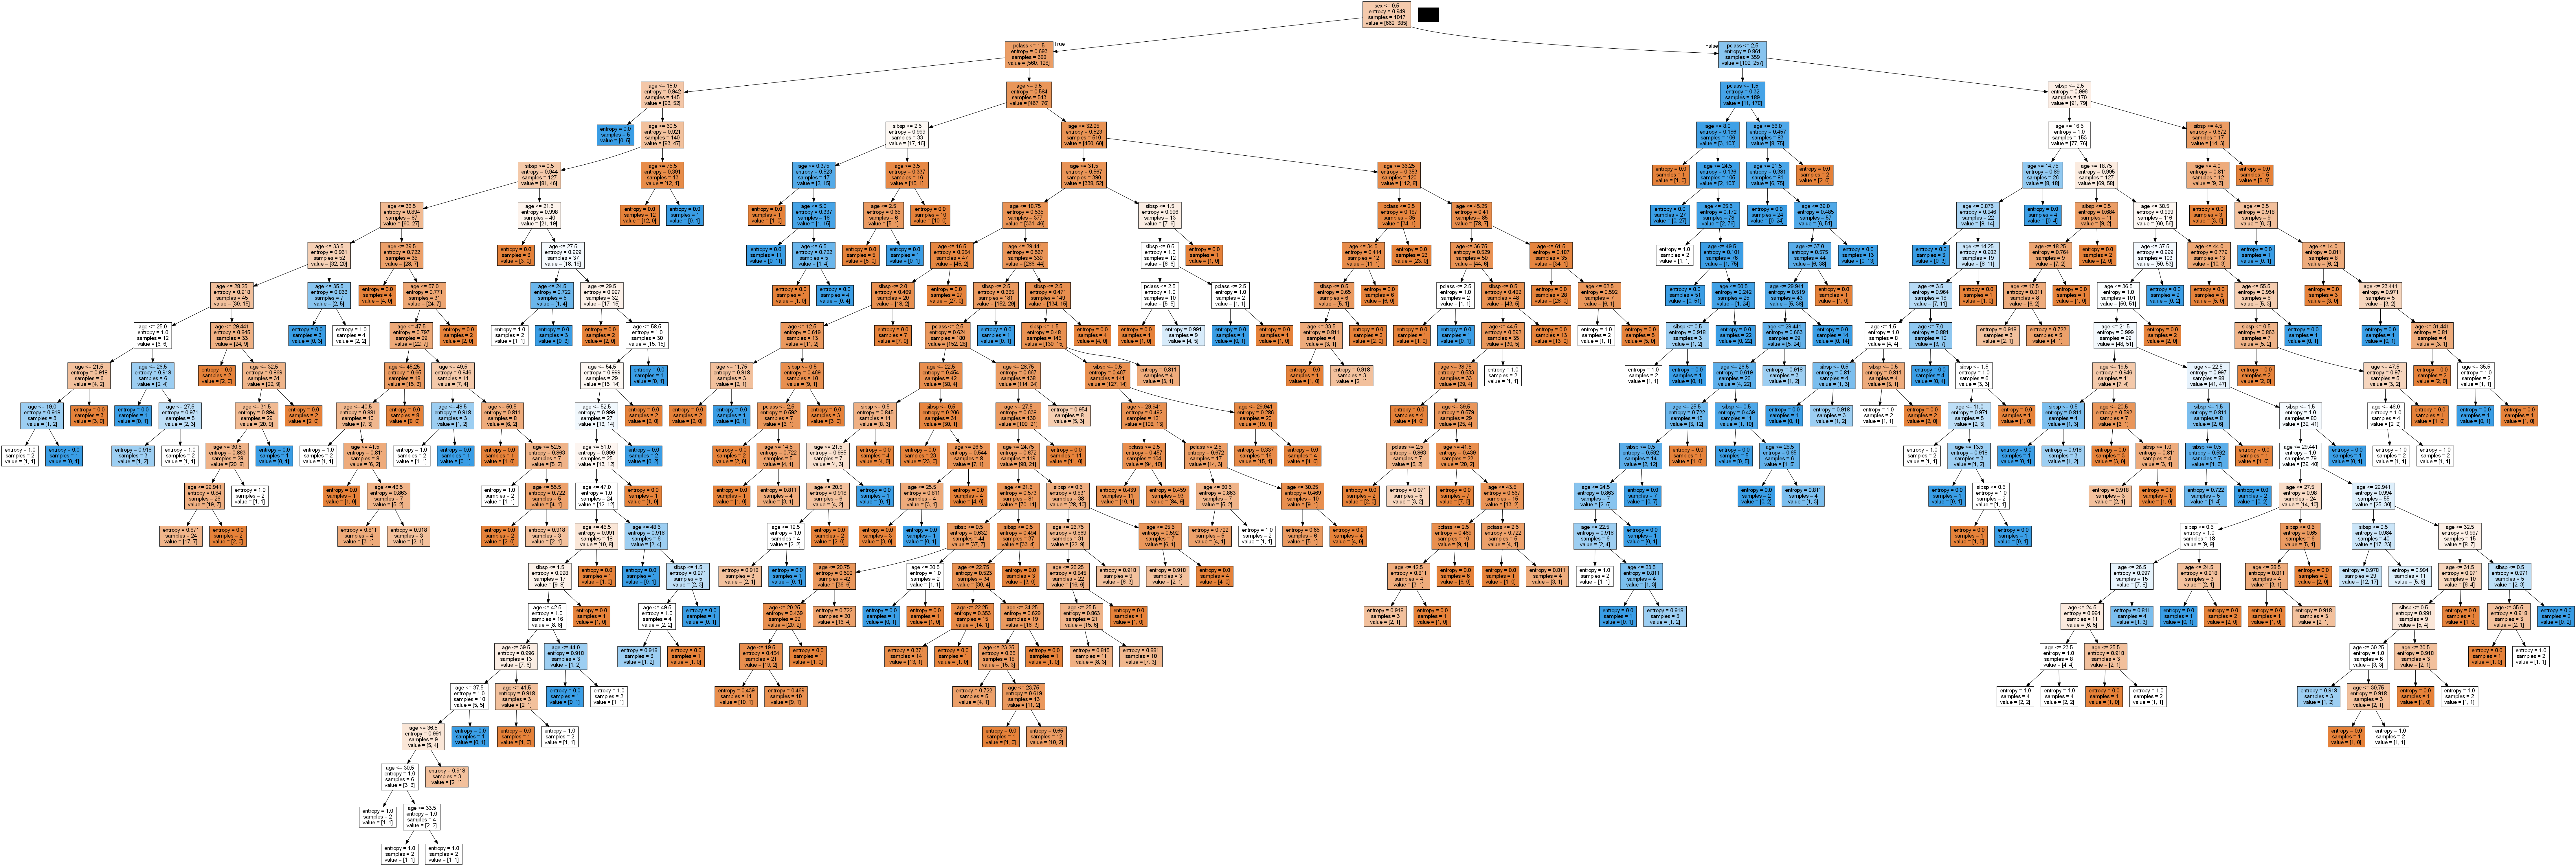

In [19]:
import pydotplus
from sklearn import tree
data=tree.export_graphviz(dt, out_file=None,feature_names=x_train.columns,filled=True)
graph=pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

### GridSearchCV() 

In [20]:
from sklearn.model_selection import GridSearchCV
p_grid={'criterion':['gini','entropy'],'max_depth':np.arange(3,10)}
model=DecisionTreeClassifier()
model_gscv=GridSearchCV(model,p_grid,cv=10)
model_gscv.fit(x_train,y_train)
print(model_gscv.best_params_)

{'criterion': 'gini', 'max_depth': 4}


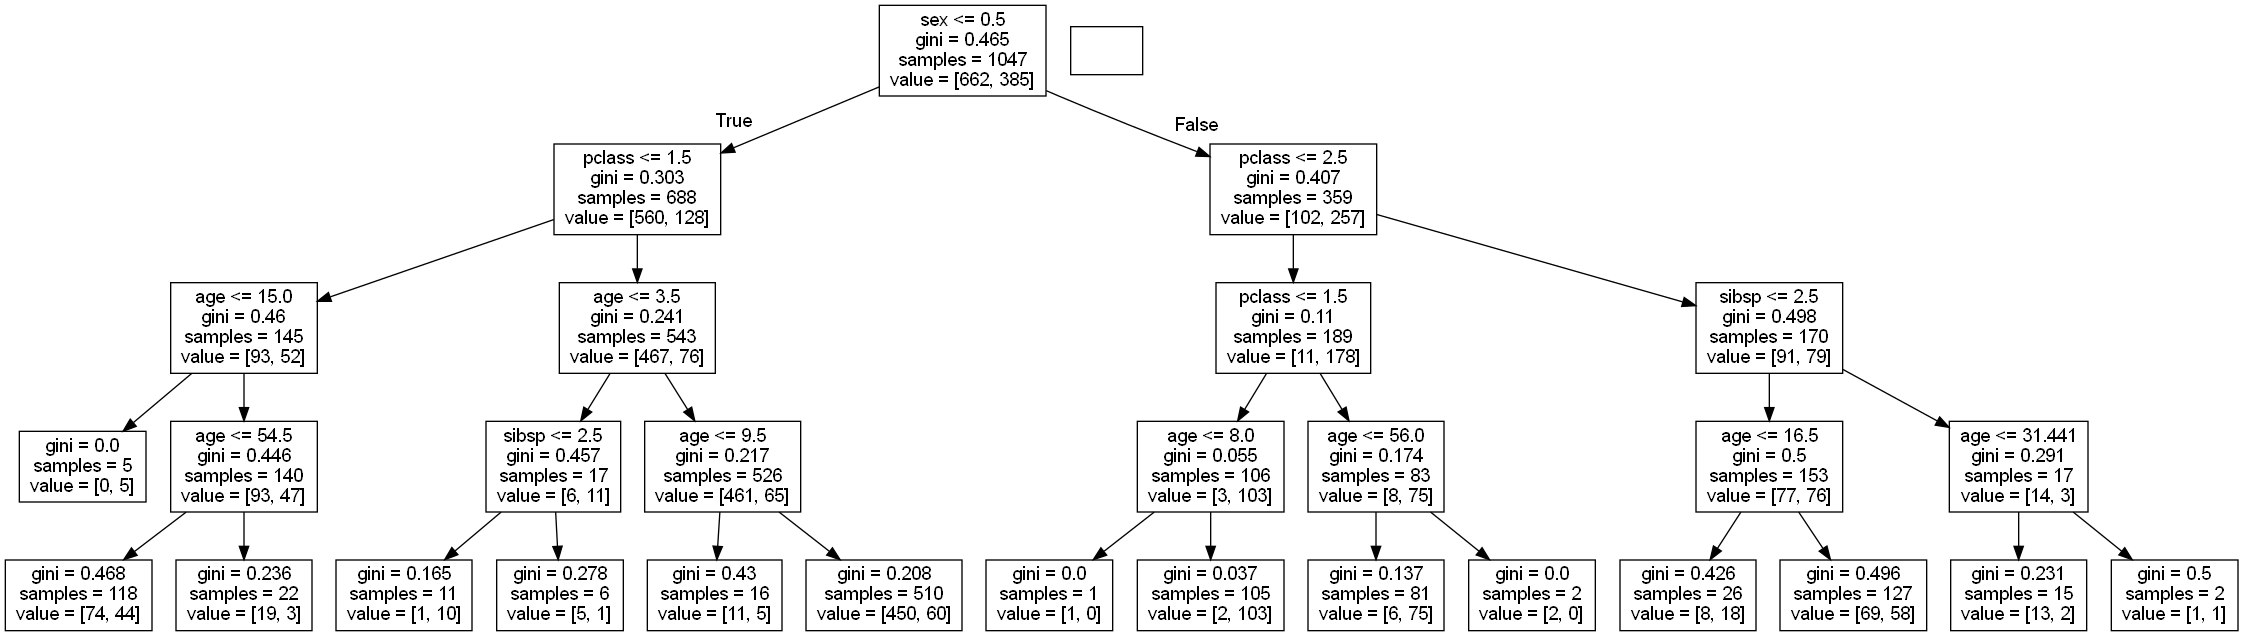

In [36]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=4)
dt2=dt1.fit(x_train,y_train)
y_pred=dt2.predict(x_test)

data=tree.export_graphviz(dt2,out_file=None,feature_names=x_train.columns)
graph=pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

In [37]:
cm=classification_report(y_test,y_pred)
print(cm)
print("Accuracy is (in %):",accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.72      0.95      0.82       147
           1       0.89      0.54      0.67       115

    accuracy                           0.77       262
   macro avg       0.80      0.74      0.75       262
weighted avg       0.79      0.77      0.75       262

Accuracy is (in %): 76.7175572519084


### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

dt3=RandomForestClassifier(n_estimators=60,max_depth=4)
dt3.fit(x_train,y_train)
y_pred=dt3.predict(x_test)
print(classification_report(y_test,y_pred))
print("Accuracy is (in %):",accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       147
           1       0.80      0.71      0.76       115

    accuracy                           0.80       262
   macro avg       0.80      0.79      0.79       262
weighted avg       0.80      0.80      0.80       262

Accuracy is (in %): 79.77099236641222


### There is approximately, 3% improvement in accuracy